In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import f1_score

num_genes = 53

## 1,281 genes (core iCD signature) that were differentially expressed (fold change ≥ 1.5) between 2 independent iCD and Ctl groups.

In [2]:
core = pd.read_csv('data/core_icd.csv')
core.rename(columns={'Gene ID':'Gene_ID'}, inplace=True)
# core = core[core['Gene_ID'].apply(lambda x: str(x).isdigit())]
# core = core[core.Gene_ID.astype(int).isin(dataset.Gene_ID.astype(int))]
# core = core[core['Gene_ID'].apply(lambda x: isinstance(x, int))]
core

,Gene_ID,Gene Symbol,iCD-1 vs Ctl Fold change >= 1.5,Log FC (iCD-1 vs Ctl),iCD-2 vs Ctl Fold change >= 1.5,Log FC (iCD-2 vs Ctl )
0,405753,DUOXA2,34.267,5.099,51.931,5.699
1,4314,MMP3,21.431,4.422,29.681,4.891
2,366,AQP9,21.243,4.409,32.809,5.036
3,3576,IL8,18.578,4.216,27.838,4.799
4,50506,DUOX2,15.849,3.986,19.216,4.264
...,...,...,...,...,...,...
1276,338094,FAM151A,-9.422,-3.236,-8.349,-3.062
1277,8029,CUBN,-9.435,-3.238,-6.882,-2.783
1278,64902,AGXT2,-10.177,-3.347,-6.692,-2.742
1279,9027,NAT8,-10.575,-3.403,-6.818,-2.769


In [3]:
core = core.sort_values(["Log FC (iCD-1 vs Ctl)"], ascending=False)
core.head(60)


,Gene_ID,Gene Symbol,iCD-1 vs Ctl Fold change >= 1.5,Log FC (iCD-1 vs Ctl),iCD-2 vs Ctl Fold change >= 1.5,Log FC (iCD-2 vs Ctl )
0,405753,DUOXA2,34.267,5.099,51.931,5.699
1,4314,MMP3,21.431,4.422,29.681,4.891
2,366,AQP9,21.243,4.409,32.809,5.036
3,3576,IL8,18.578,4.216,27.838,4.799
4,50506,DUOX2,15.849,3.986,19.216,4.264
5,5225,PGC,15.305,3.936,11.905,3.574
6,7130,TNFAIP6,14.449,3.853,11.673,3.545
7,6374,CXCL5,14.101,3.818,13.939,3.801
8,1116,CHI3L1,13.731,3.779,8.139,3.025
9,5008,OSM,13.279,3.731,16.396,4.035


In [4]:
icd1 = pd.concat([core.head(num_genes), core.tail(num_genes)])

icd1

,Gene_ID,Gene Symbol,iCD-1 vs Ctl Fold change >= 1.5,Log FC (iCD-1 vs Ctl),iCD-2 vs Ctl Fold change >= 1.5,Log FC (iCD-2 vs Ctl )
0,405753,DUOXA2,34.267,5.099,51.931,5.699
1,4314,MMP3,21.431,4.422,29.681,4.891
2,366,AQP9,21.243,4.409,32.809,5.036
3,3576,IL8,18.578,4.216,27.838,4.799
4,50506,DUOX2,15.849,3.986,19.216,4.264
...,...,...,...,...,...,...
1276,338094,FAM151A,-9.422,-3.236,-8.349,-3.062
1277,8029,CUBN,-9.435,-3.238,-6.882,-2.783
1278,64902,AGXT2,-10.177,-3.347,-6.692,-2.742
1279,9027,NAT8,-10.575,-3.403,-6.818,-2.769


In [5]:
core = core.sort_values(["Log FC (iCD-2 vs Ctl )"], ascending=False)
core

,Gene_ID,Gene Symbol,iCD-1 vs Ctl Fold change >= 1.5,Log FC (iCD-1 vs Ctl),iCD-2 vs Ctl Fold change >= 1.5,Log FC (iCD-2 vs Ctl )
0,405753,DUOXA2,34.267,5.099,51.931,5.699
2,366,AQP9,21.243,4.409,32.809,5.036
1,4314,MMP3,21.431,4.422,29.681,4.891
3,3576,IL8,18.578,4.216,27.838,4.799
10,3577,CXCR1,12.230,3.612,19.625,4.295
...,...,...,...,...,...,...
1273,1271,CNTFR,-8.546,-3.095,-6.979,-2.803
1266,169693,C9orf71,-6.858,-2.778,-7.636,-2.933
1272,2538,G6PC,-8.011,-3.002,-7.651,-2.936
1275,9153,SLC28A2,-9.219,-3.205,-8.322,-3.057


## 200 most differentially expressed genes between CD1, CD2 and control

In [6]:
icd2 = pd.concat([core.head(num_genes), core.tail(num_genes)])

icd2

,Gene_ID,Gene Symbol,iCD-1 vs Ctl Fold change >= 1.5,Log FC (iCD-1 vs Ctl),iCD-2 vs Ctl Fold change >= 1.5,Log FC (iCD-2 vs Ctl )
0,405753,DUOXA2,34.267,5.099,51.931,5.699
2,366,AQP9,21.243,4.409,32.809,5.036
1,4314,MMP3,21.431,4.422,29.681,4.891
3,3576,IL8,18.578,4.216,27.838,4.799
10,3577,CXCR1,12.230,3.612,19.625,4.295
...,...,...,...,...,...,...
1273,1271,CNTFR,-8.546,-3.095,-6.979,-2.803
1266,169693,C9orf71,-6.858,-2.778,-7.636,-2.933
1272,2538,G6PC,-8.011,-3.002,-7.651,-2.936
1275,9153,SLC28A2,-9.219,-3.205,-8.322,-3.057


In [7]:
hundred = pd.concat([icd1, icd2])
hundred.shape

(212, 6)

In [8]:
hundred.Gene_ID

0       405753
1         4314
2          366
3         3576
4        50506
         ...  
1273      1271
1266    169693
1272      2538
1275      9153
1276    338094
Name: Gene_ID, Length: 212, dtype: object

In [9]:
hundred.rename(columns={'Gene Symbol':'Gene_Symbol'}, inplace=True)
hundred

,Gene_ID,Gene_Symbol,iCD-1 vs Ctl Fold change >= 1.5,Log FC (iCD-1 vs Ctl),iCD-2 vs Ctl Fold change >= 1.5,Log FC (iCD-2 vs Ctl )
0,405753,DUOXA2,34.267,5.099,51.931,5.699
1,4314,MMP3,21.431,4.422,29.681,4.891
2,366,AQP9,21.243,4.409,32.809,5.036
3,3576,IL8,18.578,4.216,27.838,4.799
4,50506,DUOX2,15.849,3.986,19.216,4.264
...,...,...,...,...,...,...
1273,1271,CNTFR,-8.546,-3.095,-6.979,-2.803
1266,169693,C9orf71,-6.858,-2.778,-7.636,-2.933
1272,2538,G6PC,-8.011,-3.002,-7.651,-2.936
1275,9153,SLC28A2,-9.219,-3.205,-8.322,-3.057


## RISK dataset of control, CD no deep ulcer, CD deep ulcer, UC patients

In [10]:
dataset = pd.read_csv('data/risk.csv')
# gene_symbol = dataset.pop("Gene Symbol")
dataset.rename(columns={'Gene ID':'Gene_ID', 'Gene Symbol':'Gene_Symbol'}, inplace=True)
# gene_id = dataset.pop("Gene ID")
dataset

,Gene_ID,Gene_Symbol,CCFA_Risk_001,CCFA_Risk_002,CCFA_Risk_003,CCFA_Risk_004,CCFA_Risk_005,CCFA_Risk_006,CCFA_Risk_007,CCFA_Risk_008,...,CCFA_Risk_089,CCFA_Risk_090,CCFA_Risk_117,CCFA_Risk_118,CCFA_Risk_121,CCFA_Risk_180,CCFA_Risk_114,CCFA_Risk_139,CCFA_Risk_237,CCFA_Risk_257
0,1,A1BG,-0.53931,1.31210,-0.083781,-0.86227,0.74121,0.72868,0.79123,-0.44062,...,-1.20180,-0.208140,-0.221770,-1.67290,-0.002418,0.569290,0.81253,0.61751,0.150020,0.039876
1,2,A2M,0.79561,1.12940,0.602470,0.81323,0.80724,0.47415,0.38337,0.57451,...,-0.41766,0.233700,0.155220,-0.24888,-0.049269,-0.048866,-0.16492,1.06890,-0.224290,0.232120
2,3,A2MP1,-0.20249,-0.20249,-0.202490,-0.20249,-0.20249,0.10892,-0.20249,-0.20249,...,0.43514,1.932800,2.077500,-0.20249,0.184890,2.437500,-0.20249,1.47860,0.089707,-0.202490
3,9,NAT1,1.02630,-0.65959,1.291500,0.19540,-0.39078,1.09460,-0.21672,0.36204,...,0.16248,0.372190,-0.019795,0.19675,0.392790,0.112410,-0.34924,-0.30852,0.606460,0.173880
4,10,NAT2,0.24641,-7.72410,-0.542870,0.39032,-4.82710,-0.58034,-1.78130,-0.16412,...,0.69774,0.008138,0.013065,0.70364,-0.229340,-0.216230,0.41874,-2.34260,0.000504,-0.296990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36367,100653021,LOC100653021,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
36368,100653022,PP12719,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
36369,100653023,LOC100653023,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
36370,100653024,LOC100653024,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000


In [11]:
dataset.sort_values('Gene_Symbol')

,Gene_ID,Gene_Symbol,CCFA_Risk_001,CCFA_Risk_002,CCFA_Risk_003,CCFA_Risk_004,CCFA_Risk_005,CCFA_Risk_006,CCFA_Risk_007,CCFA_Risk_008,...,CCFA_Risk_089,CCFA_Risk_090,CCFA_Risk_117,CCFA_Risk_118,CCFA_Risk_121,CCFA_Risk_180,CCFA_Risk_114,CCFA_Risk_139,CCFA_Risk_237,CCFA_Risk_257
35558,100533182,1/2_SBSRNA4,-1.84700,-0.29867,-1.647200,-0.48506,0.148170,-1.342600,-0.15981,-0.59770,...,0.18565,0.113140,-0.635880,-0.42911,0.013477,-0.86869,0.025045,-0.486590,0.126380,-1.80860
21262,353008,3_8_1_3,-1.46790,-1.49320,-0.565830,1.24030,-1.636600,-1.926600,-2.38750,1.62510,...,0.89387,0.068202,-2.005000,0.39839,-2.387500,-0.41717,0.276840,-2.288300,-0.448920,-0.63496
21263,353009,3_8_1_4,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
21264,353010,3_8_1_5,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
11831,55016,42064,0.57983,1.12740,0.870450,-0.38460,1.989100,0.791070,1.25040,-0.35596,...,-0.86746,-0.293080,-0.051494,-1.30390,0.841630,1.05240,-1.768800,0.873410,0.094807,0.40714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9292,26009,ZZZ3,-0.19404,0.40600,-0.098714,0.51559,0.569950,0.029898,0.29743,0.10408,...,-0.10331,-0.111390,-0.089172,-0.13961,-0.010948,0.49369,-1.319300,-0.041259,-0.004015,-0.17904
19579,259265,bA255A11_4,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
18004,150478,bA395L14_12,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
20355,286453,dJ341D10_1,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000


In [12]:
# dataset_clean.sort_values('Gene_Symbol')

In [13]:
# postprocessed
dataset_clean = pd.read_csv('data/risk_data_cleaned.csv')
# gene_symbol = dataset.pop("Gene Symbol")
dataset_clean.rename(columns={'gene_name':'Gene_Symbol'}, inplace=True)
# gene_id = dataset.pop("Gene ID")
dataset_clean


,Gene_Symbol,CCFA_Risk_001,CCFA_Risk_002,CCFA_Risk_003,CCFA_Risk_004,CCFA_Risk_005,CCFA_Risk_006,CCFA_Risk_007,CCFA_Risk_008,CCFA_Risk_009,...,CCFA_Risk_244,CCFA_Risk_245,CCFA_Risk_246,CCFA_Risk_247,CCFA_Risk_248,CCFA_Risk_249,CCFA_Risk_250,CCFA_Risk_251,CCFA_Risk_252,CCFA_Risk_253
0,LOC100506145,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,DDX11L1,0.000000,0.015338,0.000000,0.013754,0.000000,0.016261,0.080938,0.016086,0.043369,...,0.001628,0.000000,0.001019,0.008059,0.000000,0.021876,0.012109,0.033918,0.000000,0.00000
2,DDX11L1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,WASH7P,2.336832,2.056603,2.836626,2.174813,1.696051,2.730285,3.354926,3.006871,3.080797,...,4.033125,3.650517,3.311391,4.207582,3.669361,4.051151,3.965843,3.510557,3.497057,3.57512
4,MIR1302-2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36367,IL9R,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
36368,WASIR1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
36369,WASH6P,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
36370,DDX11L16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [15]:
dataset = dataset_clean.copy()

### Match patient IDs with symptoms

In [16]:
full_ids = np.array(dataset.columns)[2:]
len(full_ids)

252

In [17]:
# find order of patients in dataset
patient_ids = np.array([int(i[-3:].lstrip("0"))-1 for i in full_ids])
patient_ids

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [18]:


with open('sample_titles.txt') as f:
    lines = f.read()

patients = np.array(lines.split("\t"))
num_patients = len(patients)
print(num_patients, "patients")
patients

322 patients


array(['"CD Female with Macroscopic inflammation and No Deep Ulcer (CCFA_Risk_001)"',
       '"CD Male with Macroscopic inflammation and No Deep Ulcer (CCFA_Risk_002)"',
       '"CD Female with Macroscopic inflammation and No Deep Ulcer (CCFA_Risk_003)"',
       '"CD Male with Macroscopic inflammation and No Deep Ulcer (CCFA_Risk_004)"',
       '"CD Female with Macroscopic inflammation and No Deep Ulcer (CCFA_Risk_005)"',
       '"CD Female with Macroscopic inflammation and Deep Ulcer (CCFA_Risk_006)"',
       '"CD Male with Macroscopic inflammation and No Deep Ulcer (CCFA_Risk_007)"',
       '"CD Male with No Microscopic or Macroscopic inflammation and No Deep Ulcer (CCFA_Risk_008)"',
       '"CD Female with Macroscopic inflammation and No Deep Ulcer (CCFA_Risk_009)"',
       '"Not IBD Male (CCFA_Risk_010)"', '"Not IBD Male (CCFA_Risk_011)"',
       '"CD Female with Microscopic inflammation and No Deep Ulcer (CCFA_Risk_012)"',
       '"CD Male with Macroscopic inflammation and No Deep

In [19]:


def classify(x):
    if "Not IBD" in x: # control
#         print(x)
        return 0
    elif "CD " in x and "No Deep Ulcer " in x: # Crohn's Disease no deep ulcer
        return 1
    elif "CD " in x: # Crohn's Disease deep ulcer
#         print(x)
        return 2
    else:
#         print(x)
        return 3 # Ulcerative Collitis

vec = np.vectorize(classify)

disease_labels = vec(patients)[patient_ids]
disease_labels

array([1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 2, 2,
       1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1,
       2, 1, 2, 2, 2, 2, 1, 1, 0, 0, 1, 1, 1, 2, 1, 1, 2, 2, 0, 0, 1, 0,
       1, 2, 2, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 3, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 3, 1, 2, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2,
       1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 3, 2, 2, 2, 2, 1, 2, 3, 3, 3, 3, 3,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2,
       1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1,
       1, 2, 1, 1, 3, 1, 1, 2, 2, 2, 3, 3, 3, 3, 2, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 1])

In [20]:
UC = disease_labels == 3

CD_no_ulcer = disease_labels == 1 
CD_ulcer = disease_labels == 2
CD = CD_no_ulcer | CD_ulcer
control = disease_labels == 0


In [21]:
def get_label(disease_id):
    if disease_id == 0:
        return "_control"
    elif disease_id == 1:
        return "_CD_plain"
    elif disease_id == 2:
        return "_CD_deep_ulcer"
    else:
        return "_UC"

symptom_IDs = list((patient_ids+1).astype('str'))
    
for i in range(len(disease_labels)):
    d = disease_labels[i]
    label = get_label(d)
    symptom_IDs[i] += label
    
    
    
        

In [22]:


symptom_IDs = np.array(symptom_IDs).astype('str')
symptom_IDs

array(['2_CD_plain', '3_CD_plain', '4_CD_plain', '5_CD_plain',
       '6_CD_deep_ulcer', '7_CD_plain', '8_CD_plain', '9_CD_plain',
       '10_control', '11_control', '12_CD_plain', '13_CD_plain',
       '14_control', '15_CD_plain', '16_CD_plain', '17_CD_deep_ulcer',
       '18_CD_plain', '19_control', '20_control', '21_CD_deep_ulcer',
       '22_CD_deep_ulcer', '23_CD_deep_ulcer', '24_CD_plain',
       '25_CD_plain', '26_CD_plain', '27_CD_deep_ulcer', '28_control',
       '29_CD_plain', '30_CD_plain', '31_control', '32_CD_plain',
       '33_control', '34_control', '35_control', '36_control',
       '37_CD_deep_ulcer', '38_control', '39_control', '40_CD_plain',
       '41_control', '42_control', '43_CD_plain', '44_control',
       '45_CD_plain', '46_CD_deep_ulcer', '47_CD_plain',
       '48_CD_deep_ulcer', '49_CD_deep_ulcer', '50_CD_deep_ulcer',
       '51_CD_deep_ulcer', '52_CD_plain', '53_CD_plain', '54_control',
       '55_control', '56_CD_plain', '57_CD_plain', '58_CD_plain',
      

In [23]:
UC_cols = symptom_IDs[UC]
# UC_cols
CD_cols = symptom_IDs[CD]
control_cols = symptom_IDs[control]
control_cols

array(['10_control', '11_control', '14_control', '19_control',
       '20_control', '28_control', '31_control', '33_control',
       '34_control', '35_control', '36_control', '38_control',
       '39_control', '41_control', '42_control', '44_control',
       '54_control', '55_control', '64_control', '65_control',
       '67_control', '72_control', '76_control', '77_control',
       '78_control', '79_control', '80_control', '81_control',
       '82_control', '83_control', '84_control', '85_control',
       '86_control', '87_control', '88_control', '89_control',
       '90_control', '117_control', '118_control', '120_control',
       '121_control', '180_control'], dtype='<U17')

In [24]:
gene_cols = np.array(dataset.columns[:2])
new_headers = np.concatenate([gene_cols, symptom_IDs], axis=0)
dataset.columns = new_headers

In [25]:
dataset

,Gene_Symbol,CCFA_Risk_001,2_CD_plain,3_CD_plain,4_CD_plain,5_CD_plain,6_CD_deep_ulcer,7_CD_plain,8_CD_plain,9_CD_plain,...,244_UC,245_UC,246_UC,247_UC,248_UC,249_UC,250_UC,251_UC,252_CD_deep_ulcer,253_CD_plain
0,LOC100506145,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,DDX11L1,0.000000,0.015338,0.000000,0.013754,0.000000,0.016261,0.080938,0.016086,0.043369,...,0.001628,0.000000,0.001019,0.008059,0.000000,0.021876,0.012109,0.033918,0.000000,0.00000
2,DDX11L1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,WASH7P,2.336832,2.056603,2.836626,2.174813,1.696051,2.730285,3.354926,3.006871,3.080797,...,4.033125,3.650517,3.311391,4.207582,3.669361,4.051151,3.965843,3.510557,3.497057,3.57512
4,MIR1302-2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36367,IL9R,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
36368,WASIR1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
36369,WASH6P,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
36370,DDX11L16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


# Crohn's disease analysis

In [26]:
CD_df = dataset.drop(UC_cols, axis=1)
CD_df

,Gene_Symbol,CCFA_Risk_001,2_CD_plain,3_CD_plain,4_CD_plain,5_CD_plain,6_CD_deep_ulcer,7_CD_plain,8_CD_plain,9_CD_plain,...,225_CD_plain,227_CD_plain,228_CD_plain,229_CD_deep_ulcer,230_CD_deep_ulcer,231_CD_deep_ulcer,236_CD_deep_ulcer,237_CD_plain,252_CD_deep_ulcer,253_CD_plain
0,LOC100506145,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,DDX11L1,0.000000,0.015338,0.000000,0.013754,0.000000,0.016261,0.080938,0.016086,0.043369,...,0.004914,0.000000,0.024377,0.000000,0.030436,0.000000,0.000000,0.000000,0.000000,0.00000
2,DDX11L1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,WASH7P,2.336832,2.056603,2.836626,2.174813,1.696051,2.730285,3.354926,3.006871,3.080797,...,2.919365,3.481022,3.581678,3.808659,3.474014,3.848498,4.040578,3.621321,3.497057,3.57512
4,MIR1302-2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36367,IL9R,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
36368,WASIR1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
36369,WASH6P,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
36370,DDX11L16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [27]:
# select_all = dataset[dataset.Gene_ID.astype(str).isin(hundred.Gene_ID.astype(str))]
# CD_df.Gene_Symbol.astype(str).isin(hundred.Gene_Symbol.astype(str)) & CD_df["1_CD_plain"] < 0

In [28]:
random_sample = CD_df.iloc[CD_df.sample(50).index,:]


In [29]:
# include genes known to be relevant
with open("data/ibd_genes.txt", "r") as fp:   # Unpickling
    full_text = fp.read()
ibd_genes = np.unique(np.asarray(full_text.split("\n")))
ibd_genes

array(['ATG16L1', 'CNR1', 'CRP', 'DLG5', 'FCRL3', 'FHIT', 'HLA_B',
       'HLA_DRB1', 'HLA_DRB5', 'IL10', 'IL10RA', 'IL10RB', 'IL12B',
       'IL23R', 'IRGM', 'JAK2', 'LRRK2', 'LTA', 'MIF', 'MUC2', 'NOD2',
       'PTPN2', 'PTPN21', 'PTPN22', 'REG1A', 'SLC22A4', 'SLC22A5',
       'STAT1', 'STAT3', 'TCF4', 'TCF7L2', 'TLR1', 'TLR2', 'TLR4', 'TLR6',
       'TNF', 'TNFAIP2', 'TNFAIP3', 'TNFRSF6B', 'TPMT', 'TYK2', 'ZNF365'],
      dtype='<U8')

In [30]:
CD_df[CD_df.Gene_Symbol.astype(str).isin(hundred.Gene_Symbol.astype(str))]

,Gene_Symbol,CCFA_Risk_001,2_CD_plain,3_CD_plain,4_CD_plain,5_CD_plain,6_CD_deep_ulcer,7_CD_plain,8_CD_plain,9_CD_plain,...,225_CD_plain,227_CD_plain,228_CD_plain,229_CD_deep_ulcer,230_CD_deep_ulcer,231_CD_deep_ulcer,236_CD_deep_ulcer,237_CD_plain,252_CD_deep_ulcer,253_CD_plain
588,FCN3,1.251886,3.738682,3.342878,0.128305,3.311911,1.864480,2.299733,0.326551,1.367536,...,2.329099,1.908795,1.820035,1.274946,2.424193,3.273917,2.338954,0.821096,2.692614,0.098814
858,GUCA2B,4.079937,0.274158,3.314701,7.652291,0.821396,3.137539,0.376297,6.895626,3.087242,...,7.273601,2.668488,6.580287,6.553592,1.932813,1.805875,2.808485,6.950454,4.252522,8.804605
1098,FAM151A,2.271045,0.186879,1.212134,7.122662,1.761762,0.620925,1.947269,6.357739,2.124592,...,3.086934,3.791650,5.718265,4.408407,0.993331,2.370869,1.584984,3.729778,3.178978,6.655981
1728,HMGCS2,0.344609,0.000000,0.705158,3.400159,0.876336,1.530257,0.194453,0.875960,1.406916,...,3.269079,2.657956,2.918028,2.315265,1.028261,2.454796,0.976694,1.519853,0.646929,3.532251
1742,FCGR1B,1.193646,2.480512,2.591292,0.116464,2.421378,1.603334,2.378814,0.478460,1.658838,...,1.317728,1.367933,0.890484,2.277269,1.931629,1.732051,2.215947,1.250168,2.342298,0.240702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33816,OSM,0.206498,6.183362,5.101018,0.142217,4.946247,3.030594,1.777020,0.203606,2.543686,...,0.822713,2.410152,1.614170,1.806900,3.338593,3.919982,3.325898,3.371457,4.369166,0.634829
33874,SLC5A4,1.221919,0.245571,0.410296,3.256114,0.154918,0.478806,0.338250,2.887997,0.480892,...,1.586938,0.608551,1.641435,0.773291,0.511912,0.784445,0.348300,1.100287,0.645161,2.797602
34320,EGFL6,1.731165,5.079678,3.278908,0.188868,4.600135,2.175368,1.650215,0.423376,1.247264,...,0.787849,1.588205,1.304810,1.648593,3.970834,3.018488,2.040742,0.519714,3.191110,0.180482
35372,SLC6A14,2.926931,0.195466,5.230206,0.044809,3.021367,3.283942,2.246145,0.118321,2.308170,...,0.893979,2.305113,1.167587,2.286118,4.456419,1.205508,2.322462,1.019343,2.489382,0.142995


In [31]:
select_hundred = CD_df[CD_df.Gene_Symbol.astype(str).isin(hundred.Gene_Symbol.astype(str)) | CD_df.Gene_Symbol.astype(str).isin(ibd_genes)]
select_hundred.Gene_Symbol.values

array(['FCN3', 'GUCA2B', 'FAM151A', 'IL23R', 'PTPN22', 'HMGCS2', 'FCGR1B',
       'FCGR1C', 'FCGR1A', 'S100A9', 'S100A12', 'S100A8', 'MUC1', 'FCRL4',
       'FCRL3', 'CRP', 'FCGR3A', 'FCGR3B', 'SELE', 'FMO1', 'CHI3L1',
       'IL10', 'HSD11B1', 'APOB', 'NAT8', 'NAT8B', 'REG1A', 'REG1P',
       'IL1B', 'IL1RN', 'LYPD1', 'LCT', 'TNFAIP6', 'STAT1', 'CPO',
       'CXCR2', 'CXCR1', 'SLC11A1', 'SLC23A3', 'ATG16L1', 'UGT1A6',
       'ITIH3', 'FHIT', 'PROK2', 'TM4SF4', 'AADAC', 'FLJ35424', 'TLR1',
       'TLR6', 'FDCSP', 'IL8', 'CXCL5', 'CXCL3', 'CXCL9', 'CXCL11',
       'TLR2', 'LRAT', 'AGXT2', 'C6', 'FOXD1', 'SLC22A4', 'SLC22A5',
       'IRGM', 'IL12B', 'FABP6', 'TPMT', 'LTA', 'TNF', 'TREM1', 'PGC',
       'GSTA2', 'GSTA1', 'GSTA5', 'CNR1', 'TNFAIP3', 'FRMD1', 'CYP3A7',
       'CYP3A4', 'SLC13A1', 'CLEC5A', 'MGAM', 'JAK2', 'CDKN2B-AS1',
       'CNTFR', 'C9orf71', 'LOC392364', 'TLR4', 'LCN2', 'LAMC3', 'FCN1',
       'SLC34A3', 'CUBN', 'ZNF365', 'DLG5', 'CDHR1', 'SFRP5', 'ABCC2',
       'TCF7L

In [34]:

select_hundred = pd.concat([select_hundred, random_sample]).drop_duplicates()
# select_hundred.pop("Gene_ID")
select_hundred = select_hundred.set_index("Gene_Symbol")
select_hundred
# select_hundred = select_hundred[:-1]

,CCFA_Risk_001,2_CD_plain,3_CD_plain,4_CD_plain,5_CD_plain,6_CD_deep_ulcer,7_CD_plain,8_CD_plain,9_CD_plain,10_control,...,225_CD_plain,227_CD_plain,228_CD_plain,229_CD_deep_ulcer,230_CD_deep_ulcer,231_CD_deep_ulcer,236_CD_deep_ulcer,237_CD_plain,252_CD_deep_ulcer,253_CD_plain
Gene_Symbol,,,,,,,,,,,,,,,,,,,,,
FCN3,1.251886,3.738682,3.342878,0.128305,3.311911,1.864480,2.299733,0.326551,1.367536,0.505713,...,2.329099,1.908795,1.820035,1.274946,2.424193,3.273917,2.338954,0.821096,2.692614,0.098814
GUCA2B,4.079937,0.274158,3.314701,7.652291,0.821396,3.137539,0.376297,6.895626,3.087242,8.751873,...,7.273601,2.668488,6.580287,6.553592,1.932813,1.805875,2.808485,6.950454,4.252522,8.804605
FAM151A,2.271045,0.186879,1.212134,7.122662,1.761762,0.620925,1.947269,6.357739,2.124592,7.364324,...,3.086934,3.791650,5.718265,4.408407,0.993331,2.370869,1.584984,3.729778,3.178978,6.655981
IL23R,0.554264,0.226010,0.544101,0.584026,0.403182,0.582813,0.436746,0.323074,0.389574,0.227513,...,0.360955,0.292997,0.527573,0.480428,0.642329,0.396015,0.513148,0.320844,0.505621,0.219941
PTPN22,1.405990,2.244452,2.459819,2.417646,2.504867,2.336747,3.548992,2.890585,3.065450,1.906883,...,2.755571,2.462430,3.127900,3.373720,2.463112,3.214794,3.402014,2.972654,2.739578,2.315843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UBE2CP1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
RPL17P20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CUTA,5.580276,5.709984,5.747809,5.482304,5.673457,5.672834,5.644886,5.669941,5.972149,5.419282,...,5.698131,6.174509,6.176383,5.549929,5.651304,5.716751,5.495442,5.406253,5.629387,5.740615


In [35]:

select_hundred.index.values

array(['FCN3', 'GUCA2B', 'FAM151A', 'IL23R', 'PTPN22', 'HMGCS2', 'FCGR1B',
       'FCGR1C', 'FCGR1A', 'S100A9', 'S100A12', 'S100A8', 'MUC1', 'FCRL4',
       'FCRL3', 'CRP', 'FCGR3A', 'FCGR3B', 'SELE', 'FMO1', 'CHI3L1',
       'IL10', 'HSD11B1', 'APOB', 'NAT8', 'NAT8B', 'REG1A', 'REG1P',
       'IL1B', 'IL1RN', 'LYPD1', 'LCT', 'TNFAIP6', 'STAT1', 'CPO',
       'CXCR2', 'CXCR1', 'SLC11A1', 'SLC23A3', 'ATG16L1', 'UGT1A6',
       'ITIH3', 'FHIT', 'PROK2', 'TM4SF4', 'AADAC', 'FLJ35424', 'TLR1',
       'TLR6', 'FDCSP', 'IL8', 'CXCL5', 'CXCL3', 'CXCL9', 'CXCL11',
       'TLR2', 'LRAT', 'AGXT2', 'C6', 'FOXD1', 'SLC22A4', 'SLC22A5',
       'IRGM', 'IL12B', 'FABP6', 'TPMT', 'LTA', 'TNF', 'TREM1', 'PGC',
       'GSTA2', 'GSTA1', 'GSTA5', 'CNR1', 'TNFAIP3', 'FRMD1', 'CYP3A7',
       'CYP3A4', 'SLC13A1', 'CLEC5A', 'MGAM', 'JAK2', 'CDKN2B-AS1',
       'CNTFR', 'C9orf71', 'LOC392364', 'TLR4', 'LCN2', 'LAMC3', 'FCN1',
       'SLC34A3', 'CUBN', 'ZNF365', 'DLG5', 'CDHR1', 'SFRP5', 'ABCC2',
       'TCF7L

## Final sample of 220 genes
### 128 matches with RISK dataset, plus 42 other genes known to be relevant, plus random sample of 50

In [36]:
select_hundred

,CCFA_Risk_001,2_CD_plain,3_CD_plain,4_CD_plain,5_CD_plain,6_CD_deep_ulcer,7_CD_plain,8_CD_plain,9_CD_plain,10_control,...,225_CD_plain,227_CD_plain,228_CD_plain,229_CD_deep_ulcer,230_CD_deep_ulcer,231_CD_deep_ulcer,236_CD_deep_ulcer,237_CD_plain,252_CD_deep_ulcer,253_CD_plain
Gene_Symbol,,,,,,,,,,,,,,,,,,,,,
FCN3,1.251886,3.738682,3.342878,0.128305,3.311911,1.864480,2.299733,0.326551,1.367536,0.505713,...,2.329099,1.908795,1.820035,1.274946,2.424193,3.273917,2.338954,0.821096,2.692614,0.098814
GUCA2B,4.079937,0.274158,3.314701,7.652291,0.821396,3.137539,0.376297,6.895626,3.087242,8.751873,...,7.273601,2.668488,6.580287,6.553592,1.932813,1.805875,2.808485,6.950454,4.252522,8.804605
FAM151A,2.271045,0.186879,1.212134,7.122662,1.761762,0.620925,1.947269,6.357739,2.124592,7.364324,...,3.086934,3.791650,5.718265,4.408407,0.993331,2.370869,1.584984,3.729778,3.178978,6.655981
IL23R,0.554264,0.226010,0.544101,0.584026,0.403182,0.582813,0.436746,0.323074,0.389574,0.227513,...,0.360955,0.292997,0.527573,0.480428,0.642329,0.396015,0.513148,0.320844,0.505621,0.219941
PTPN22,1.405990,2.244452,2.459819,2.417646,2.504867,2.336747,3.548992,2.890585,3.065450,1.906883,...,2.755571,2.462430,3.127900,3.373720,2.463112,3.214794,3.402014,2.972654,2.739578,2.315843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UBE2CP1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
RPL17P20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CUTA,5.580276,5.709984,5.747809,5.482304,5.673457,5.672834,5.644886,5.669941,5.972149,5.419282,...,5.698131,6.174509,6.176383,5.549929,5.651304,5.716751,5.495442,5.406253,5.629387,5.740615


## Patient statistics

In [37]:
select_hundred.describe() 

,CCFA_Risk_001,2_CD_plain,3_CD_plain,4_CD_plain,5_CD_plain,6_CD_deep_ulcer,7_CD_plain,8_CD_plain,9_CD_plain,10_control,...,225_CD_plain,227_CD_plain,228_CD_plain,229_CD_deep_ulcer,230_CD_deep_ulcer,231_CD_deep_ulcer,236_CD_deep_ulcer,237_CD_plain,252_CD_deep_ulcer,253_CD_plain
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,...,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,2.296019,2.295851,2.702193,2.319388,2.395675,2.303510,1.946093,2.355575,2.388331,2.497603,...,2.541443,2.427750,2.589509,2.799017,2.459804,2.344681,2.400230,2.649885,2.756429,2.469193
std,2.390663,2.714417,2.553350,2.762010,2.548882,2.201667,2.048728,2.580530,2.193169,2.972216,...,2.393821,2.216792,2.237420,2.354336,2.368629,2.153114,2.194973,2.480587,2.429099,2.773908
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.335162,0.098143,0.473588,0.099620,0.159350,0.380243,0.280547,0.164071,0.564600,0.107138,...,0.566658,0.640417,0.802974,0.802218,0.353074,0.446096,0.536975,0.694406,0.645603,0.210405
50%,1.490339,0.960964,1.997593,1.090680,1.630241,1.796015,1.369986,1.320625,1.989376,1.246169,...,1.936711,1.900819,2.073484,2.404688,1.959947,1.808432,2.021188,2.173985,2.350541,1.292189
75%,3.521690,4.076574,4.044368,3.767526,4.100785,3.576028,3.100418,3.765779,3.491243,3.940343,...,3.809926,3.707376,3.872476,4.172932,3.773698,3.567994,3.729050,3.950004,4.068425,4.234122
max,12.951119,11.410349,13.649908,11.851829,10.464952,10.819600,11.552302,10.602997,13.208601,13.140089,...,13.370109,12.263228,10.920840,12.295159,11.647140,10.500093,12.045548,13.528908,11.676562,12.244303


## Gene statistics

In [38]:
gene_stats = select_hundred.T.describe()
gene_stats

Gene_Symbol,FCN3,GUCA2B,FAM151A,IL23R,PTPN22,HMGCS2,FCGR1B,FCGR1C,FCGR1A,S100A9,...,NCLP1,DMRTA2,NEDD1,ABCA10,G6PC2,UBE2CP1,RPL17P20,CUTA,KCNK5,LOC735247
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,...,215.0,215.000000,215.000000,215.000000,215.000000,215.0,215.0,215.000000,215.000000,215.0
mean,1.320542,5.668816,3.803594,0.401595,2.691800,2.745414,1.217732,1.730958,2.108775,6.365588,...,0.0,0.020567,2.359746,0.913611,0.028143,0.0,0.0,5.838355,4.178999,0.0
std,1.056001,2.351685,1.954082,0.215890,0.523078,1.698939,0.908790,1.126940,1.274516,2.344682,...,0.0,0.032765,0.378135,0.424329,0.054859,0.0,0.0,0.494498,0.850179,0.0
min,0.000000,0.274158,0.000000,0.030687,0.908490,0.000000,0.063456,0.071897,0.170508,2.167040,...,0.0,0.000000,0.432100,0.118190,0.000000,0.0,0.0,4.945933,0.731670,0.0
25%,0.330260,3.691641,2.133545,0.282625,2.416399,1.342601,0.393552,0.683095,0.943145,4.419311,...,0.0,0.000000,2.241430,0.586686,0.000000,0.0,0.0,5.514680,3.698934,0.0
50%,1.035076,6.176120,3.729778,0.373203,2.755571,2.640985,1.080817,1.669516,2.072645,6.320517,...,0.0,0.000000,2.424933,0.883210,0.000000,0.0,0.0,5.691619,4.282806,0.0
75%,2.225001,7.502269,5.399353,0.480931,3.075871,3.723907,1.806864,2.525713,3.065472,7.841469,...,0.0,0.034236,2.611275,1.186292,0.041467,0.0,0.0,5.985191,4.812652,0.0
max,3.738682,10.569656,7.644415,2.195911,3.641598,8.649547,4.610355,5.470252,6.037718,13.406338,...,0.0,0.186985,3.154210,2.137081,0.570201,0.0,0.0,7.367295,5.724175,0.0


In [39]:
select_hundred.T

Gene_Symbol,FCN3,GUCA2B,FAM151A,IL23R,PTPN22,HMGCS2,FCGR1B,FCGR1C,FCGR1A,S100A9,...,NCLP1,DMRTA2,NEDD1,ABCA10,G6PC2,UBE2CP1,RPL17P20,CUTA,KCNK5,LOC735247
CCFA_Risk_001,1.251886,4.079937,2.271045,0.554264,1.405990,0.344609,1.193646,1.791312,2.150328,6.706717,...,0.0,0.000000,2.387325,0.445919,0.000000,0.0,0.0,5.580276,4.581345,0.0
2_CD_plain,3.738682,0.274158,0.186879,0.226010,2.244452,0.000000,2.480512,3.184823,3.896467,10.658005,...,0.0,0.000000,2.627673,0.122159,0.057351,0.0,0.0,5.709984,0.731670,0.0
3_CD_plain,3.342878,3.314701,1.212134,0.544101,2.459819,0.705158,2.591292,3.579920,4.078390,9.322091,...,0.0,0.000000,2.381537,0.390772,0.000000,0.0,0.0,5.747809,3.817311,0.0
4_CD_plain,0.128305,7.652291,7.122662,0.584026,2.417646,3.400159,0.116464,0.243054,0.313219,2.967245,...,0.0,0.000000,2.645395,0.692976,0.000000,0.0,0.0,5.482304,5.041242,0.0
5_CD_plain,3.311911,0.821396,1.761762,0.403182,2.504867,0.876336,2.421378,3.215342,3.751296,10.053797,...,0.0,0.000000,3.154210,0.154918,0.000000,0.0,0.0,5.673457,1.784164,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231_CD_deep_ulcer,3.273917,1.805875,2.370869,0.396015,3.214794,2.454796,1.732051,2.458211,3.095132,7.532515,...,0.0,0.027979,2.627737,0.661479,0.084698,0.0,0.0,5.716751,3.278960,0.0
236_CD_deep_ulcer,2.338954,2.808485,1.584984,0.513148,3.402014,0.976694,2.215947,3.056230,3.611818,7.623241,...,0.0,0.000000,2.553845,0.755002,0.000000,0.0,0.0,5.495442,3.201589,0.0
237_CD_plain,0.821096,6.950454,3.729778,0.320844,2.972654,1.519853,1.250168,1.946199,2.373962,6.429169,...,0.0,0.000000,2.514051,1.489435,0.032423,0.0,0.0,5.406253,4.776922,0.0
252_CD_deep_ulcer,2.692614,4.252522,3.178978,0.505621,2.739578,0.646929,2.342298,3.114287,3.698747,9.052487,...,0.0,0.056588,2.478182,0.873450,0.058208,0.0,0.0,5.629387,3.495958,0.0


In [40]:
select_hundred.T.loc[select_hundred.T.index.str.endswith('_CD_plain'),"AADAC"].values.shape

(110,)

In [41]:
select_hundred.T.loc[select_hundred.T.index.str.endswith('_CD_deep_ulcer'),"AADAC"].values.shape

(62,)

In [42]:
select_hundred.T.loc[select_hundred.T.index.str.endswith('_control'),"AADAC"].values.shape

(42,)

### Find top differentially expressed genes

### Welch's t-test at the 1% significance level

In [43]:
# all_genes = np.array(select_hundred.T.columns)
# len(all_genes)

In [44]:
import math
all_genes = list(select_hundred.index.values)

# top_genes = {}
fc = []
logp = []
most_sig = []
most_sig_fewer = []
most_sig_fewest = []
all_sig = []
for gene_symbol in all_genes:
#     print(gene_symbol)
    controls = select_hundred.T.loc[select_hundred.T.index.str.endswith('_control'), gene_symbol].values
    CD_plains = select_hundred.T.loc[select_hundred.T.index.str.endswith('_CD_plain'),gene_symbol].values
    CD_ulcers = select_hundred.T.loc[select_hundred.T.index.str.endswith('_CD_deep_ulcer'),gene_symbol].values

    CD = np.concatenate([CD_plains, CD_ulcers], axis=0)
    if len(CD.shape) > 1:
        CD = CD[:,0]
    if len(controls.shape) > 1:
        controls = controls[:,0]

    log2FC = np.mean(CD) - np.mean(controls) #already log2-transformed
    
    stat, p_val = stats.ttest_ind(CD, controls, equal_var=False)

    if not np.isnan(log2FC):


        fc.append(log2FC)
        lp = -math.log(p_val)
        logp.append(lp)
        if p_val < 0.01:
            all_sig.append(gene_symbol)
#             if lp < 15 or abs(log2FC) > 4:
#                 most_sig_fewest.append(gene_symbol)
            if lp < 6 or abs(log2FC) > 2.6:
                most_sig_fewest.append(gene_symbol)
            if lp < 10 or abs(log2FC) > 2.2:
                most_sig_fewer.append(gene_symbol)
            if lp < 10 or abs(log2FC) > 1.5:
                most_sig.append(gene_symbol)
#             print("lp:",lp)
#         else:
#             print(gene_symbol)


In [45]:
len(all_genes)

218

In [46]:
len(fc)

218

In [47]:
len(logp)

218

In [48]:
len(all_sig)

153

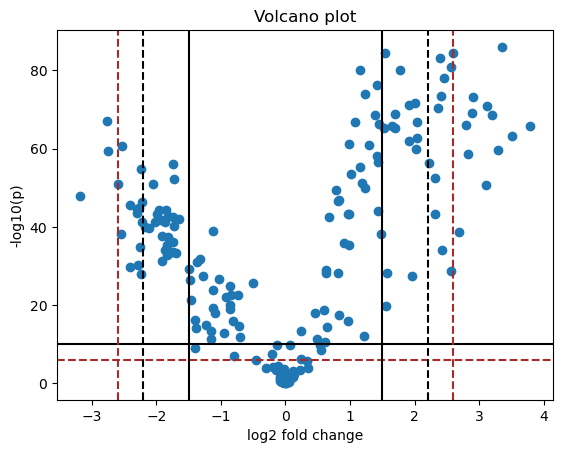

In [49]:
plt.figure()
plt.scatter(fc, logp)
plt.title("Volcano plot")
plt.axhline(y=10, c='k')
plt.axhline(y=6, c='brown', linestyle='--')

plt.axvline(x=1.5, c='k')
plt.axvline(x=-1.5, c='k')
plt.axvline(x=2.2, c='k', linestyle='--')
plt.axvline(x=-2.2, c='k', linestyle='--')
plt.axvline(x=2.6, c='brown', linestyle='--')
plt.axvline(x=-2.6, c='brown', linestyle='--')
plt.xlabel("log2 fold change")
plt.ylabel("-log10(p)")
plt.show()

In [50]:
smallest_set = np.asarray(most_sig_fewest)
smaller_set = np.asarray(most_sig_fewer)
most_sig_set = np.asarray(most_sig)
all_sig_set = np.asarray(all_sig)

In [51]:
all_sig_set.shape

(153,)

In [52]:
most_sig_set.shape

(90,)

In [53]:
smaller_set.shape

(50,)

In [54]:
smallest_set.shape

(18,)

In [52]:
# save selected genes
with open("data/most_sig_set", "wb") as fp:   #Pickling
    pickle.dump(most_sig_set, fp)

In [53]:
# save selected genes
with open("data/smaller_set", "wb") as fp:   #Pickling
    pickle.dump(smaller_set, fp)

In [54]:
# save selected genes
with open("data/smallest_set", "wb") as fp:   #Pickling
    pickle.dump(smallest_set, fp)

In [55]:
# save selected genes
with open("data/all_sig_set", "wb") as fp:   #Pickling
    pickle.dump(all_sig_set, fp)

## Hierarchical clustering heatmap 
### 119 most differentially expressed genes between CD and control patients - stat significant at 1% level
### Includes controls, CD no deep ulcer, CD deep ulcer

In [55]:
all_CD_cols = np.array(select_hundred.columns)
i = 0
for i in range(len(all_CD_cols)):
    print(i,":",all_CD_cols[i])

0 : CCFA_Risk_001
1 : 2_CD_plain
2 : 3_CD_plain
3 : 4_CD_plain
4 : 5_CD_plain
5 : 6_CD_deep_ulcer
6 : 7_CD_plain
7 : 8_CD_plain
8 : 9_CD_plain
9 : 10_control
10 : 11_control
11 : 12_CD_plain
12 : 13_CD_plain
13 : 14_control
14 : 15_CD_plain
15 : 16_CD_plain
16 : 17_CD_deep_ulcer
17 : 18_CD_plain
18 : 19_control
19 : 20_control
20 : 21_CD_deep_ulcer
21 : 22_CD_deep_ulcer
22 : 23_CD_deep_ulcer
23 : 24_CD_plain
24 : 25_CD_plain
25 : 26_CD_plain
26 : 27_CD_deep_ulcer
27 : 28_control
28 : 29_CD_plain
29 : 30_CD_plain
30 : 31_control
31 : 32_CD_plain
32 : 33_control
33 : 34_control
34 : 35_control
35 : 36_control
36 : 37_CD_deep_ulcer
37 : 38_control
38 : 39_control
39 : 40_CD_plain
40 : 41_control
41 : 42_control
42 : 43_CD_plain
43 : 44_control
44 : 45_CD_plain
45 : 46_CD_deep_ulcer
46 : 47_CD_plain
47 : 48_CD_deep_ulcer
48 : 49_CD_deep_ulcer
49 : 50_CD_deep_ulcer
50 : 51_CD_deep_ulcer
51 : 52_CD_plain
52 : 53_CD_plain
53 : 54_control
54 : 55_control
55 : 56_CD_plain
56 : 57_CD_plain
57 : 

In [56]:
sig_genes_df = select_hundred.copy()
sig_genes_df

,CCFA_Risk_001,2_CD_plain,3_CD_plain,4_CD_plain,5_CD_plain,6_CD_deep_ulcer,7_CD_plain,8_CD_plain,9_CD_plain,10_control,...,225_CD_plain,227_CD_plain,228_CD_plain,229_CD_deep_ulcer,230_CD_deep_ulcer,231_CD_deep_ulcer,236_CD_deep_ulcer,237_CD_plain,252_CD_deep_ulcer,253_CD_plain
Gene_Symbol,,,,,,,,,,,,,,,,,,,,,
FCN3,1.251886,3.738682,3.342878,0.128305,3.311911,1.864480,2.299733,0.326551,1.367536,0.505713,...,2.329099,1.908795,1.820035,1.274946,2.424193,3.273917,2.338954,0.821096,2.692614,0.098814
GUCA2B,4.079937,0.274158,3.314701,7.652291,0.821396,3.137539,0.376297,6.895626,3.087242,8.751873,...,7.273601,2.668488,6.580287,6.553592,1.932813,1.805875,2.808485,6.950454,4.252522,8.804605
FAM151A,2.271045,0.186879,1.212134,7.122662,1.761762,0.620925,1.947269,6.357739,2.124592,7.364324,...,3.086934,3.791650,5.718265,4.408407,0.993331,2.370869,1.584984,3.729778,3.178978,6.655981
IL23R,0.554264,0.226010,0.544101,0.584026,0.403182,0.582813,0.436746,0.323074,0.389574,0.227513,...,0.360955,0.292997,0.527573,0.480428,0.642329,0.396015,0.513148,0.320844,0.505621,0.219941
PTPN22,1.405990,2.244452,2.459819,2.417646,2.504867,2.336747,3.548992,2.890585,3.065450,1.906883,...,2.755571,2.462430,3.127900,3.373720,2.463112,3.214794,3.402014,2.972654,2.739578,2.315843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UBE2CP1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
RPL17P20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CUTA,5.580276,5.709984,5.747809,5.482304,5.673457,5.672834,5.644886,5.669941,5.972149,5.419282,...,5.698131,6.174509,6.176383,5.549929,5.651304,5.716751,5.495442,5.406253,5.629387,5.740615


C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


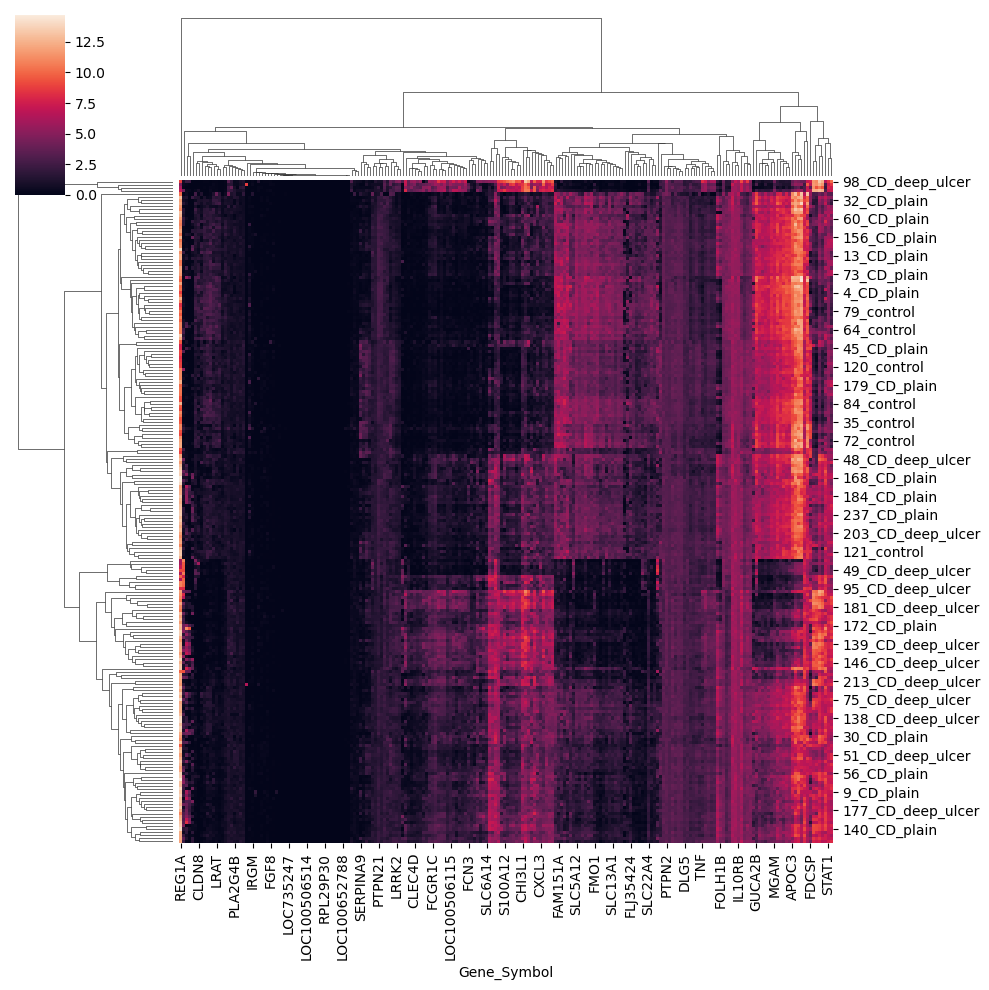

In [57]:
# sns.clustermap(top_genes.T)
# sns.clustermap(top_genes.iloc[:,np.r_[143:168, 221:228]].T)
sns.clustermap(sig_genes_df.T)
# sns.clustermap(select_hundred.iloc[:20,np.r_[143:168, 221:228]].T)

In [59]:
sig_genes_df.to_csv('data/cd_df.csv')

### Top X most differentially expressed genes between CD and control patients

In [58]:
top_genes_df = select_hundred.loc[smallest_set]
top_genes_df

,CCFA_Risk_001,2_CD_plain,3_CD_plain,4_CD_plain,5_CD_plain,6_CD_deep_ulcer,7_CD_plain,8_CD_plain,9_CD_plain,10_control,...,225_CD_plain,227_CD_plain,228_CD_plain,229_CD_deep_ulcer,230_CD_deep_ulcer,231_CD_deep_ulcer,236_CD_deep_ulcer,237_CD_plain,252_CD_deep_ulcer,253_CD_plain
Gene_Symbol,,,,,,,,,,,,,,,,,,,,,
FAM151A,2.271045,0.186879,1.212134,7.122662,1.761762,0.620925,1.947269,6.357739,2.124592,7.364324,...,3.086934,3.791650,5.718265,4.408407,0.993331,2.370869,1.584984,3.729778,3.178978,6.655981
S100A9,6.706717,10.658005,9.322091,2.967245,10.053797,8.425753,6.309956,3.719094,8.329732,2.537459,...,6.075762,7.515966,5.920669,7.684033,8.488546,7.532515,7.623241,6.429169,9.052487,4.443032
S100A8,4.792621,9.477080,8.461340,1.303471,9.011542,7.101951,5.045432,2.250714,7.250988,1.868260,...,4.930588,6.409372,4.304859,6.732136,7.477186,6.107940,6.650642,5.445774,8.260635,3.489099
MUC1,6.372508,2.131718,7.524126,2.284349,4.455215,6.575596,5.448076,3.576321,5.436545,1.910043,...,5.320418,5.288610,4.172944,5.383608,6.939463,5.057066,4.915899,5.383650,5.222055,2.329389
FCGR3B,4.643020,7.640150,6.040821,0.892710,5.715669,5.279822,3.961506,2.580386,4.925357,0.936573,...,3.313363,4.813081,3.201833,4.503070,5.568836,4.322764,5.371611,3.629381,6.169068,1.119261
CHI3L1,4.149209,8.762080,6.353683,0.343004,8.548604,4.258283,7.188196,2.276301,4.708417,0.313012,...,4.387118,4.597174,6.025577,5.434537,7.696469,7.920669,4.302642,2.991866,7.348531,1.251493
IL1B,3.766119,10.366476,7.691519,1.774132,8.457425,4.347480,4.347912,0.995659,4.679878,0.577438,...,4.100704,5.677130,4.910253,5.117485,6.460239,5.892059,7.028859,4.685377,7.273466,2.525479
IL8,3.925040,9.721778,5.816786,0.644282,7.640080,5.152288,3.224607,0.219996,4.430071,0.266983,...,3.678920,5.145669,4.521066,3.672200,5.507187,5.317608,5.346867,5.940548,7.304689,2.076636
CXCL5,5.353582,9.675719,8.133227,0.800703,6.623166,7.750605,5.008797,0.612276,5.596240,0.490991,...,3.278030,3.540300,4.591237,5.703620,6.241677,4.032153,4.985002,2.964150,7.320374,1.150782


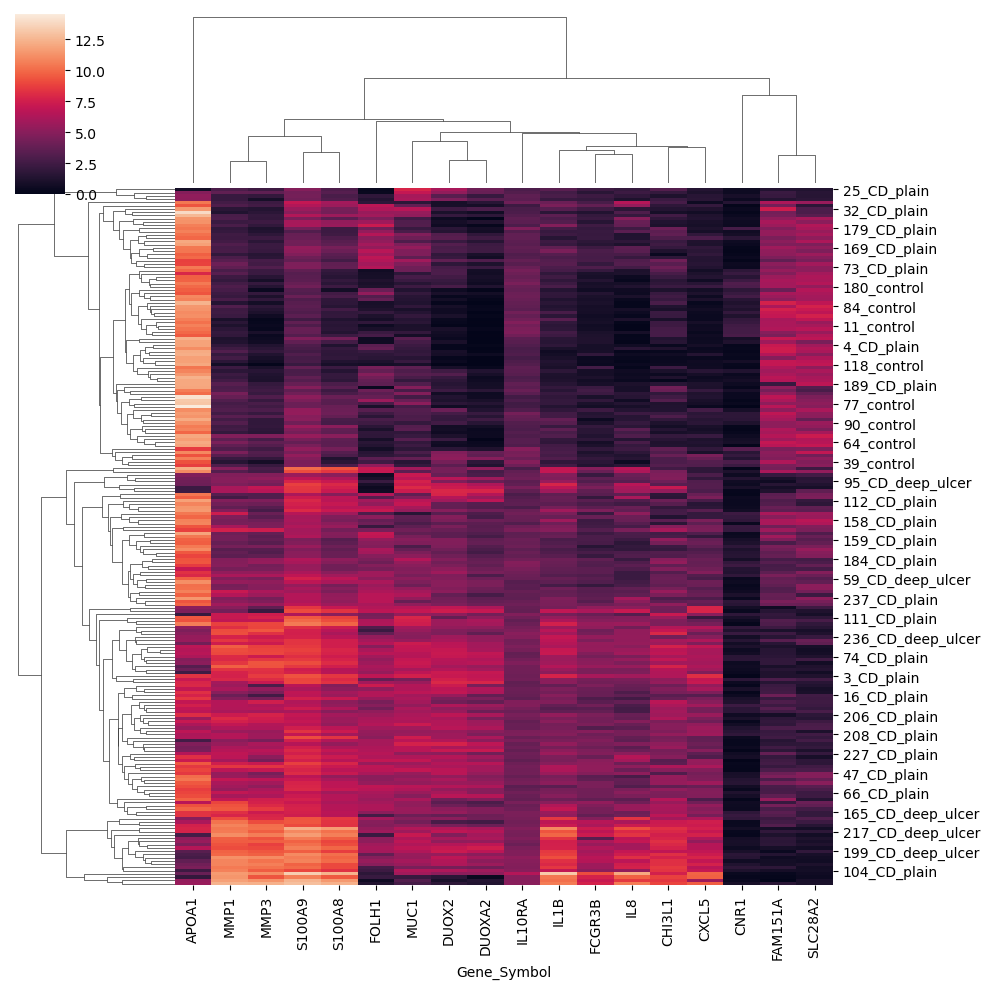

In [59]:
sns.clustermap(top_genes_df.T)

### Example: expression of top X genes in random sample of control and CD patients

In [62]:
# random sample of patients
np.random.seed(123)
rand_pids = np.random.randint(low=0, high=40, size=30, dtype=int)

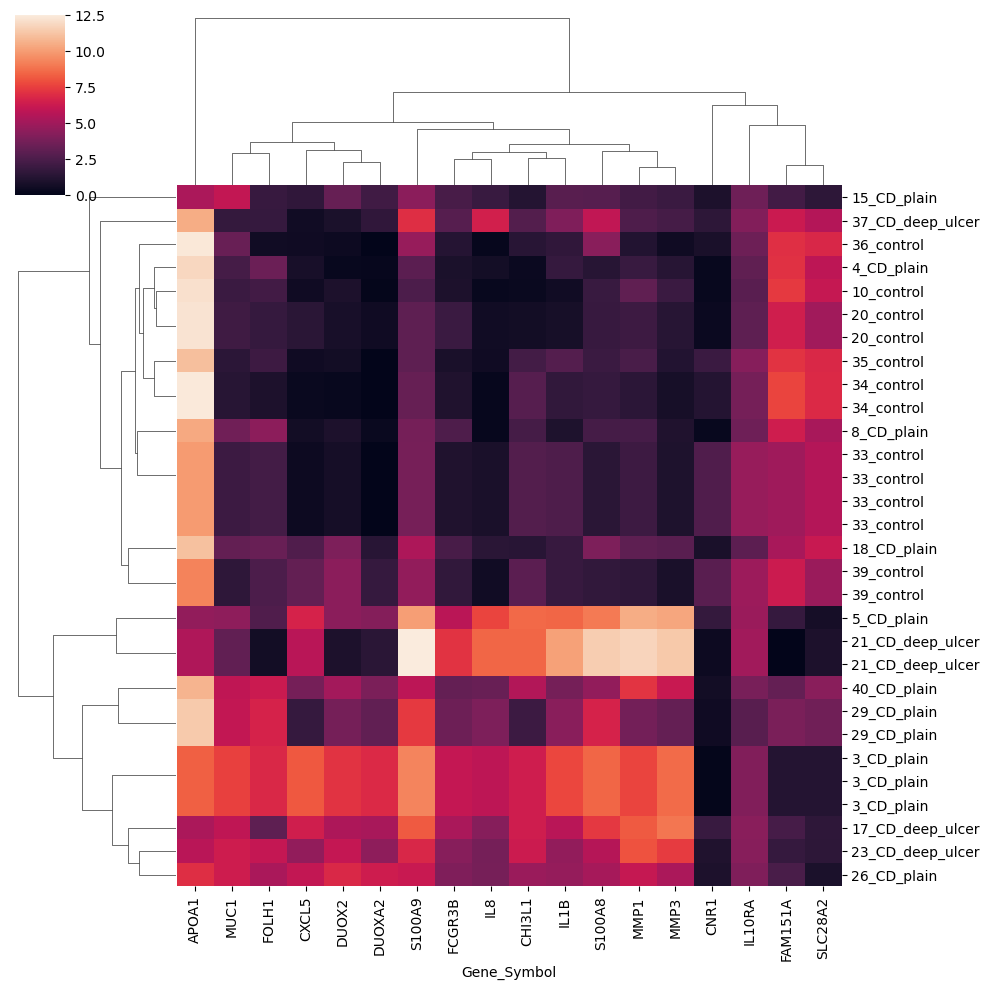

In [63]:
# sns.clustermap(top_genes_df.iloc[:,np.r_[143:168, 221:228]].T)
sns.clustermap(top_genes_df.iloc[:,np.r_[rand_pids]].T)